In [15]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import glob
import cv2
from skimage import color
from skimage import io

In [16]:
train_files=glob.glob("C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train/*/**")
len(train_files)


5216

In [17]:
from random import shuffle
shuffle(train_files)

(992, 1440)

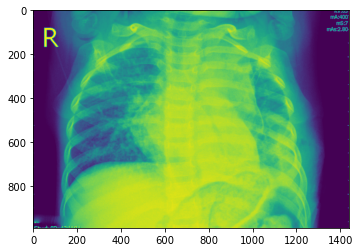

In [18]:
from PIL import Image
img=Image.open(train_files[0])
plt.imshow(img)
imarr = np.array(img)
imarr.shape

In [19]:
len(train_files)


5216

In [20]:
(np.array(Image.open(train_files[67]))).shape

(944, 1248)

In [33]:
X_train = np.zeros((len(train_files),64,64),dtype='uint8')
Y_train = np.zeros((len(train_files)))

In [32]:
image = cv2.imread(train_files[0])
image = image.resize((64,64))
img = Image.open(train_files[6])

np.array(img).shape


(356, 693, 3)

In [36]:
for i, trf in enumerate(train_files):
    im = cv2.imread(trf,0)
    
    imconv=cv2.resize(im, (64,64), interpolation = cv2.INTER_AREA)
    imconv/255
    X_train[i,:,:] = imconv
    Y_train[i] = train_files[i][60]
 

In [37]:
img = cv2.imread(train_files[0])

In [38]:
img.shape


(992, 1440, 3)

In [39]:
img = np.array(Image.open(train_files[0]))
img.shape


(992, 1440)

In [40]:
train_files

['C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person1338_bacteria_3395.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person923_bacteria_2848.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person359_bacteria_1644.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person477_bacteria_2031.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\0\\NORMAL2-IM-1310-0001.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person23_bacteria_81.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person612_bacteria_2477.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person382_bacteria_1746.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person276_bacteria_1299.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/train\\1\\person1418_bacteria_3638.jpeg',
 'C:/Users/TANIL GUPTA/Downloads/a

In [41]:
 train_files[1][60]

'1'

In [42]:
Y_train

array([1., 1., 1., ..., 1., 0., 1.])

In [45]:
X_train = X_train.reshape(len(train_files),64,64,1)

In [46]:
 model= keras.Sequential()
    
 model.add(keras.layers.Conv2D(64,(3,3),strides=1,padding='Same',activation='relu',input_shape
 =(64, 64,1)))
 model.add(keras.layers.Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
 
 model.add(keras.layers.MaxPooling2D((2,2),strides = 2))
 model.add(keras.layers.BatchNormalization())
 model.add(keras.layers.Dropout(0.3)) #here added dropout
 model.add(keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.MaxPooling2D((2,2),strides = 2))
 model.add(keras.layers.BatchNormalization())
 model.add(keras.layers.Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.BatchNormalization())
 model.add(keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.MaxPooling2D((2,2),strides = 2))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.MaxPooling2D((2,2),strides = 2))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.Conv2D(512,(3,3), strides=1,padding= 'Same', activation='relu'))
 model.add(keras.layers.BatchNormalization())
 model.add(keras.layers.Flatten())
 model.add(keras.layers.Dropout(0.5))
 model.add(keras.layers.Dense(4096, activation = "relu"))
 model.add(keras.layers.Dropout(0.5))
 model.add(keras.layers.Dense(4096, activation = "relu"))
 model.add(keras.layers.Dropout(0.5))
 model.add(keras.layers.Dense(1000, activation = "sigmoid"))
 model.add(keras.layers.Dense(3, activation = "softmax"))


In [47]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        640       
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)      

In [ ]:

model.fit(X_train, Y_train,epochs=3,validation_split = 0.15)

Epoch 1/3
  7/139 [>.............................] - ETA: 14:28 - loss: 4.3980 - accuracy: 0.3795

In [ ]:
test = glob.glob("C:/Users/TANIL GUPTA/Downloads/archive (1)/chest_xray/test/*/**")
test
len(test)

In [ ]:
X_test = np.zeros((len(test),64,64),dtype='uint8')

Y_test = np.zeros((len(test),1))
predictions = np.zeros(len(test))

In [ ]:
test[0][59]


In [ ]:
for i, trf in enumerate(test):
    im = cv2.imread(trf,0)
    

    im = cv2.resize(im, (64,64), interpolation=cv2.INTER_AREA)
    im= cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)
    X_test[i,:,:,:]=im
    Y_test[i] = test[i][59]

In [ ]:
X_test


In [ ]:
prediction = model.predict(
   X_test, 
   batch_size = None, 
   verbose = 0, 
   steps = None, 
   callbacks = None, 
   max_queue_size = 10, 
   workers = 1, 
   use_multiprocessing = False
)
prediction 

In [ ]:
for i in range(630):
    predictions[i] = np.argmax(prediction[i])
predictions  

In [ ]:
predictions.shape
